In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
%matplotlib inline

# Define la carpeta
folder = '/data_desembolsos/'
# Define el path
path = os.getcwd() + folder
# Lista los archivos
files = os.listdir(path)
files_csv = [f for f in files if f[-3:] == 'csv']
files_csv.sort()
print("Archivos en la carpeta:")
print(files_csv)


Archivos en la carpeta:
['desembolso_parte_1.csv', 'desembolso_parte_10.csv', 'desembolso_parte_11.csv', 'desembolso_parte_12.csv', 'desembolso_parte_13.csv', 'desembolso_parte_14.csv', 'desembolso_parte_2.csv', 'desembolso_parte_3.csv', 'desembolso_parte_4.csv', 'desembolso_parte_5.csv', 'desembolso_parte_6.csv', 'desembolso_parte_7.csv', 'desembolso_parte_8.csv', 'desembolso_parte_9.csv']


In [3]:
# Importa todo en un dataframe
df = pd.DataFrame()
for f in files_csv:
    data = pd.read_csv(path + f)
    df = pd.concat([df, data], axis=0, ignore_index=True)

In [4]:
df.shape

(2000000, 26)

In [6]:
df.dtypes

CodigoProducto                       int64
Identificacion                       int64
EstadoPrestamo                       int64
FechaDesembolso                     object
Plazo                                int64
TasaOriginal                       float64
TasaVigente                        float64
MontoOriginal                      float64
CODIGO_ACTIVIDAD                   float64
CODIGO_SEGMENTO                    float64
DESCRIPCION_BANCA                   object
CODIGO_AGENCIA                       int64
index                                int64
REGION                              object
ZONA                                object
AGENCIATRANSACCIONAL                object
index_segmento                     float64
DESCRIPCION_SEGMENTO                object
DESCRIPCION_SUBSEGMENTO             object
DESCRIPCION_SUBSEGMENTO_DETALLE     object
CODIGO_SECTOR                      float64
DESCRIPCION_ACTIVIDAD               object
producto_nombre                     object
CODIGO_SECT

In [7]:
df['CodigoProducto'] = df['CodigoProducto'].astype('object')
df['Identificacion'] = df['Identificacion'].astype('object')
df['CODIGO_ACTIVIDAD'] = df['CODIGO_ACTIVIDAD'].astype('object')
df['CODIGO_SEGMENTO'] = df['CODIGO_SEGMENTO'].astype('object')
df['CODIGO_AGENCIA'] = df['CODIGO_AGENCIA'].astype('object')
df['index'] = df['index'].astype('object')
df['index_segmento'] = df['index_segmento'].astype('object')
df['CODIGO_SECTOR'] = df['CODIGO_SECTOR'].astype('object')
df['CODIGO_SECTOR_ACTIVIDAD'] = df['CODIGO_SECTOR_ACTIVIDAD'].astype('object')

In [8]:
df.describe()

EstadoPrestamo         Plazo  TasaOriginal   TasaVigente  MontoOriginal
count    2.000000e+06  2.000000e+06  2.000000e+06  2.000000e+06   2.000000e+06
mean     6.936265e-01  5.131588e+02  1.592484e+01  1.589531e+01   1.131503e+04
std      1.221686e+00  5.572768e+02  6.266739e+00  6.330926e+00   4.403947e+04
min      0.000000e+00  1.000000e+00  2.300000e-01  5.900000e-01   0.000000e+00
25%      0.000000e+00  3.100000e+01  1.593000e+01  1.595000e+01   6.662511e+02
50%      0.000000e+00  3.770000e+02  1.606000e+01  1.606000e+01   1.736084e+03
75%      1.000000e+00  8.400000e+02  2.130000e+01  2.129000e+01   4.392453e+03
max      6.000000e+00  7.635000e+03  2.681000e+01  2.690000e+01   8.787116e+05

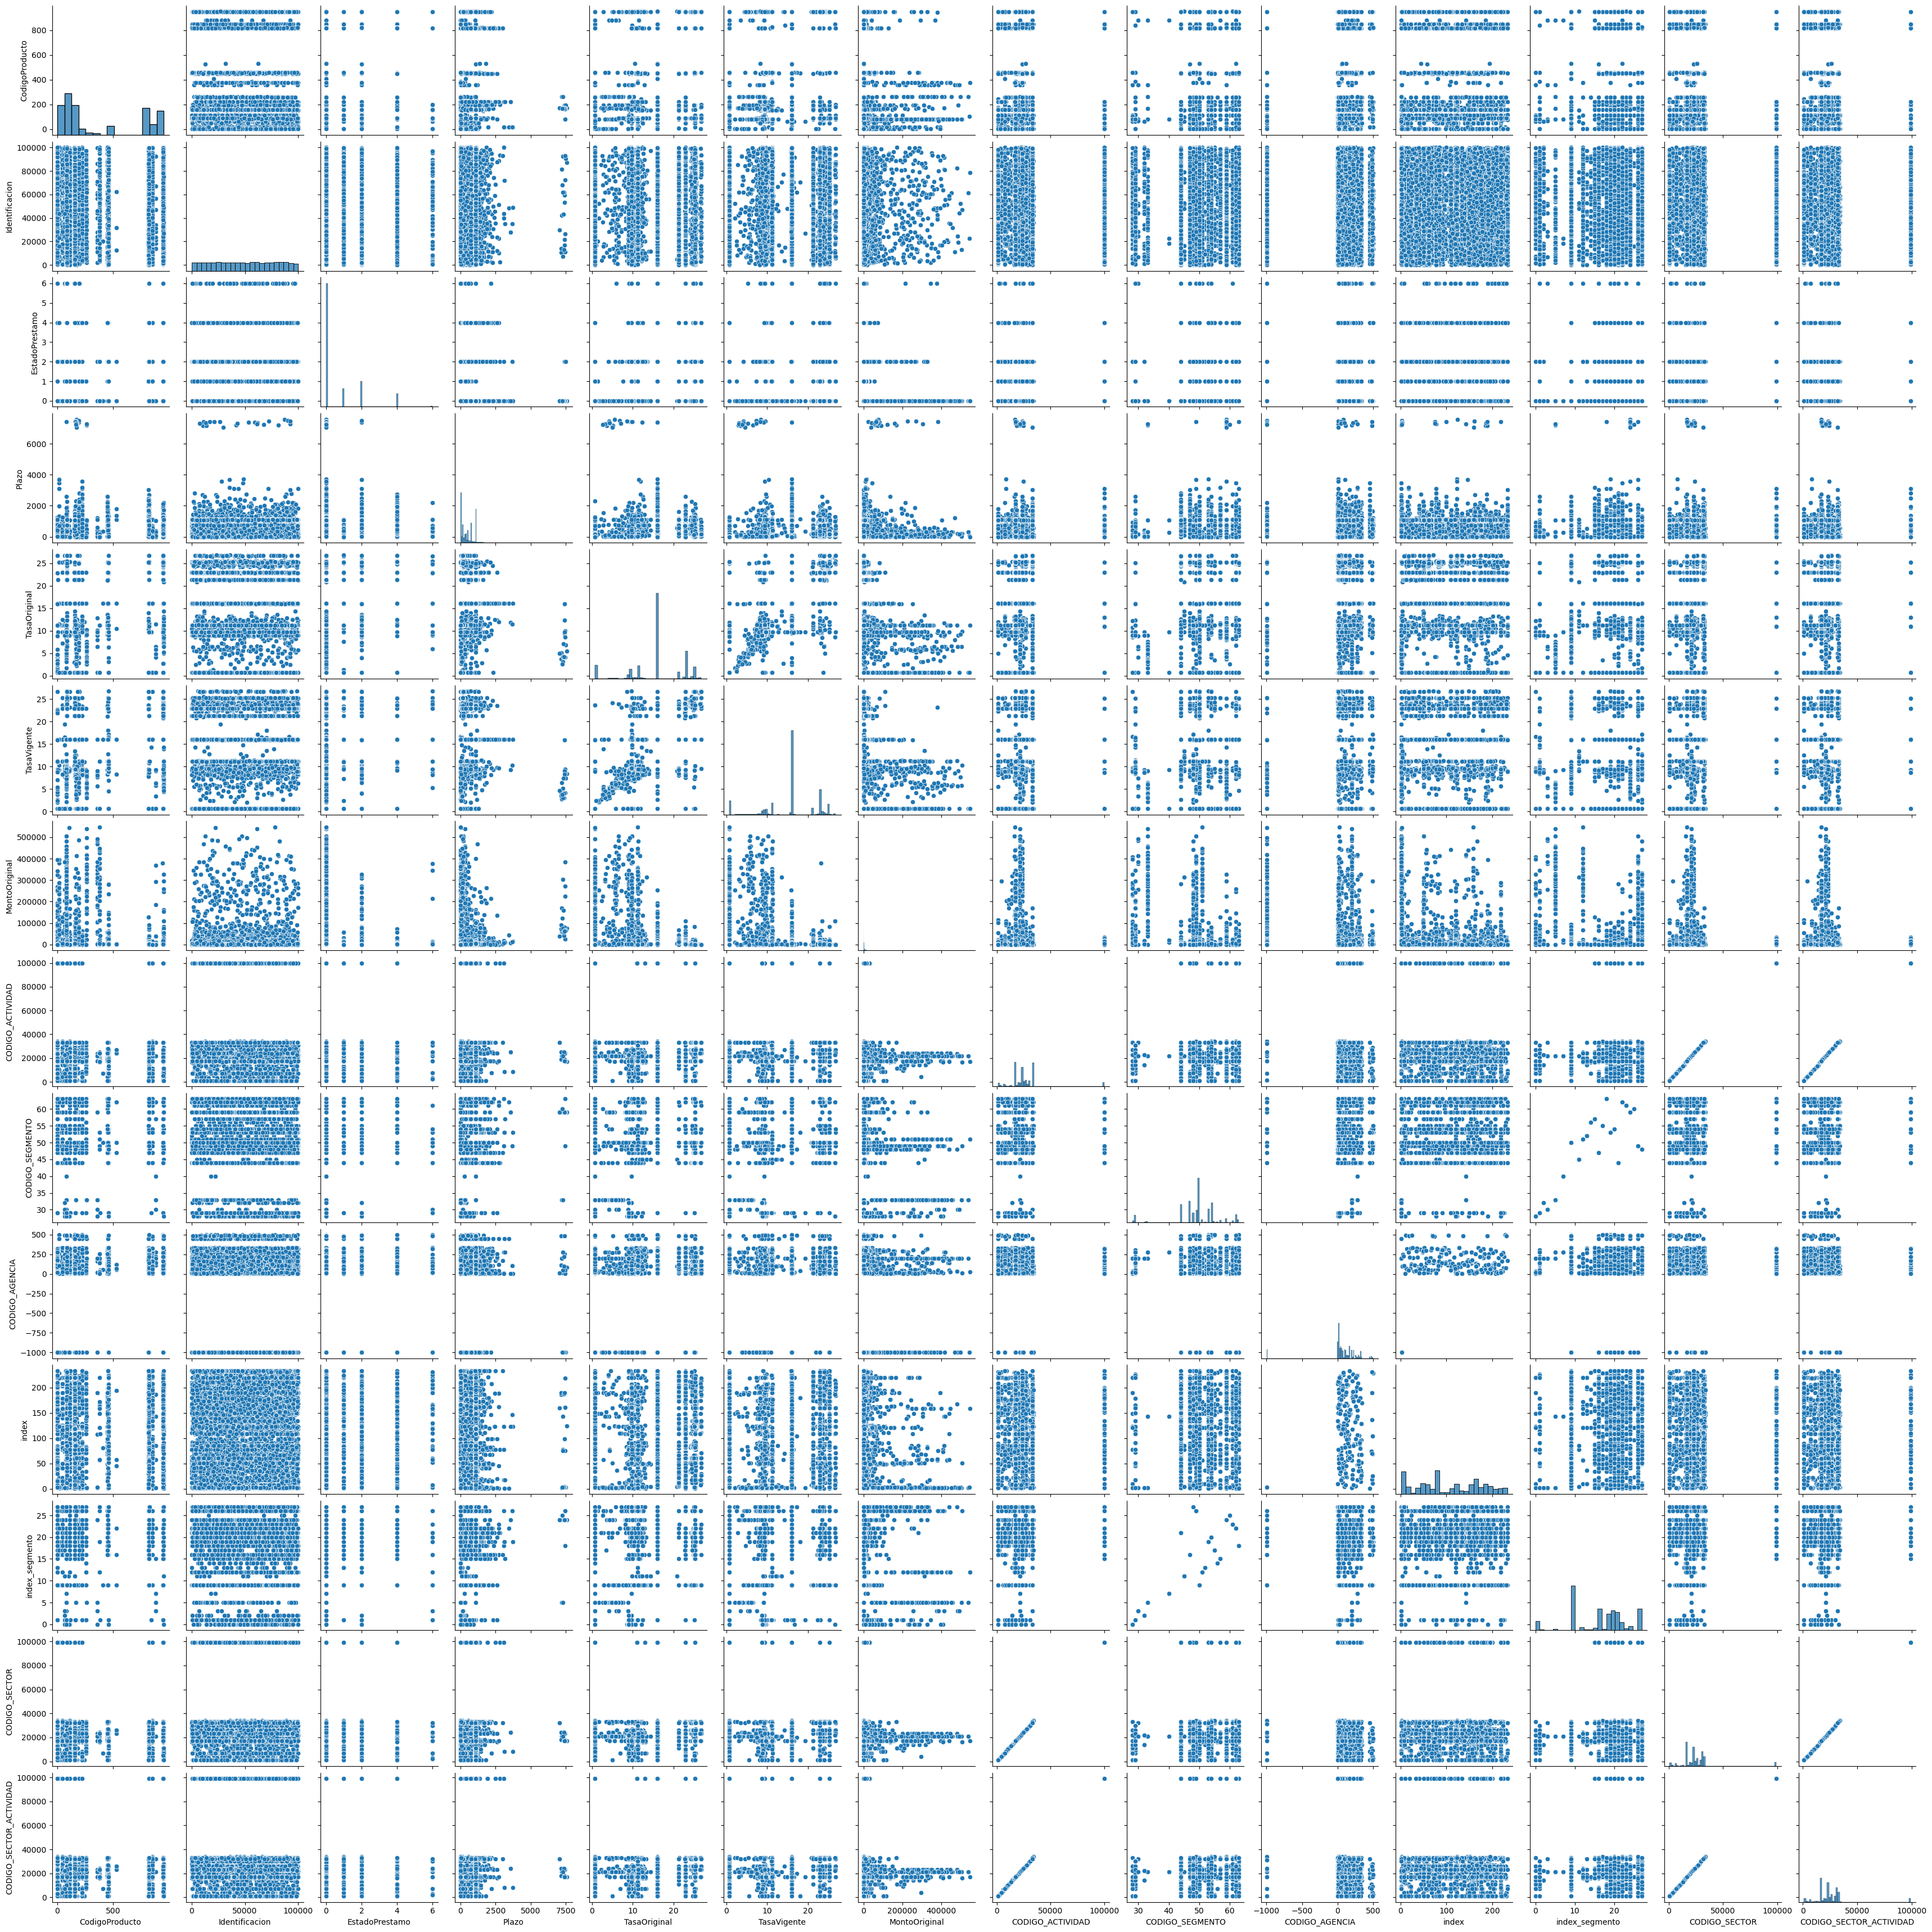

In [18]:
sns.pairplot(df.sample(10000))

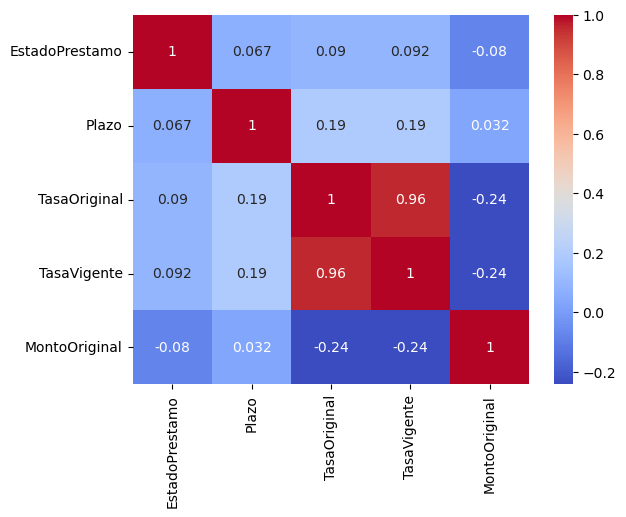

In [10]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

array([[<AxesSubplot:title={'center':'Plazo'}>,
        <AxesSubplot:title={'center':'TasaOriginal'}>],
       [<AxesSubplot:title={'center':'MontoOriginal'}>, <AxesSubplot:>]],
      dtype=object)

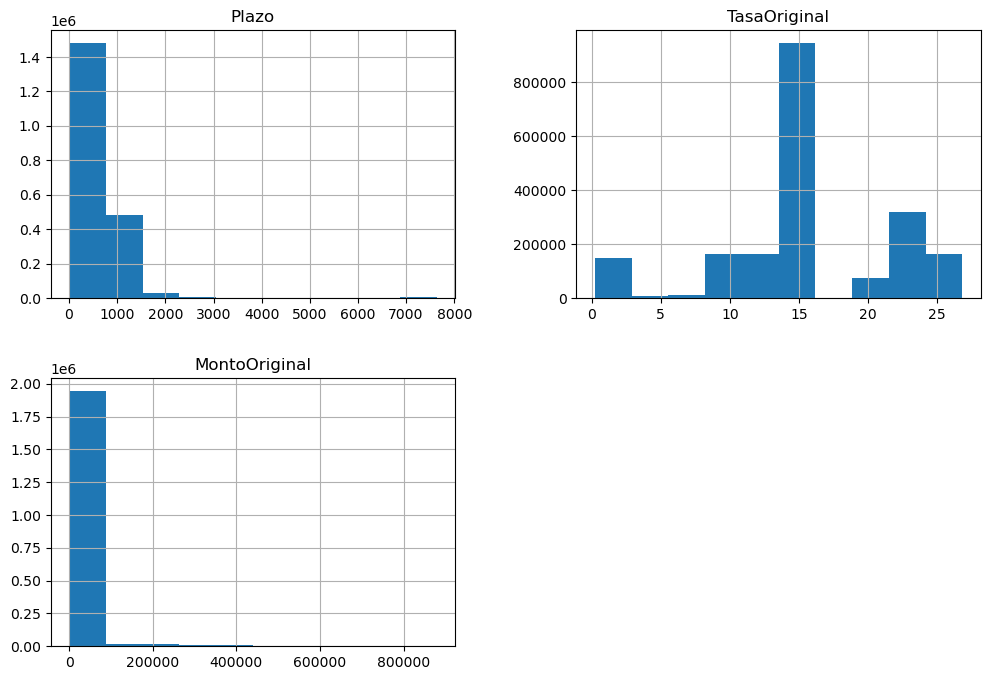

In [15]:
# Histogramas
df[['Plazo', 'TasaOriginal', 'MontoOriginal']].hist(figsize=(12, 8))

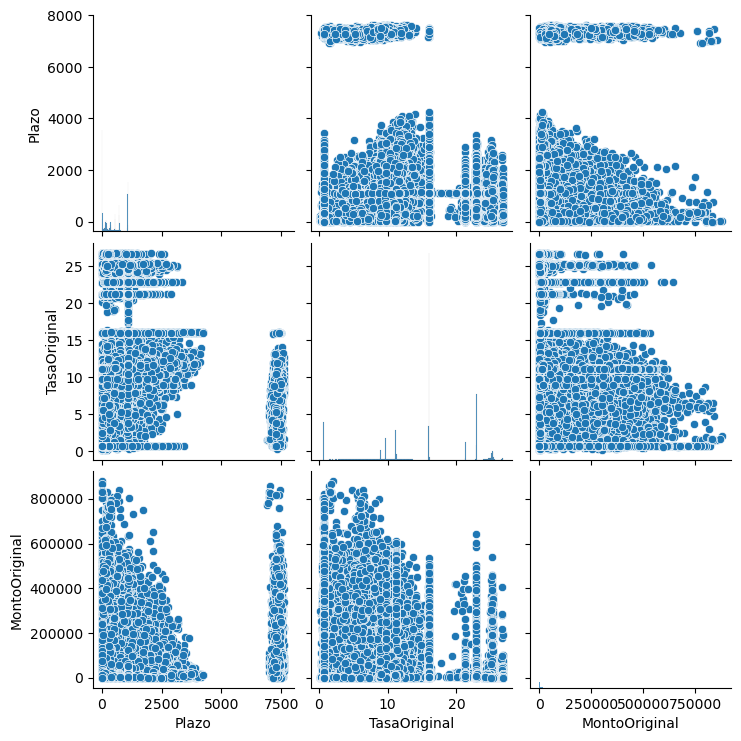

In [16]:
sns.pairplot(df[['Plazo', 'TasaOriginal', 'MontoOriginal']])


<AxesSubplot:xlabel='DESCRIPCION_BANCA', ylabel='MontoOriginal'>

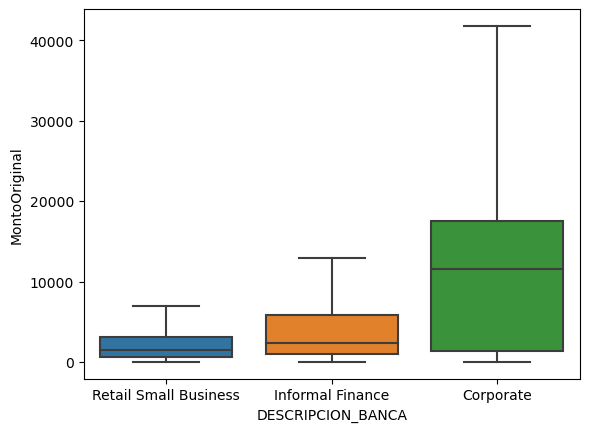

In [51]:
sns.boxplot(x='DESCRIPCION_BANCA', y='MontoOriginal',showfliers=False, data=df)


<AxesSubplot:xlabel='DESCRIPCION_BANCA', ylabel='TasaOriginal'>

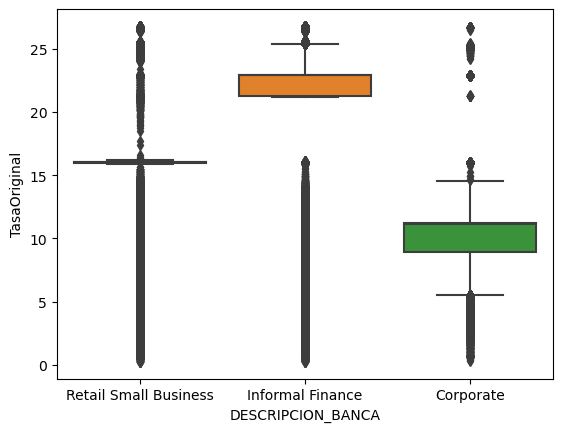

In [53]:
sns.boxplot(x='DESCRIPCION_BANCA', y='TasaOriginal', data=df)


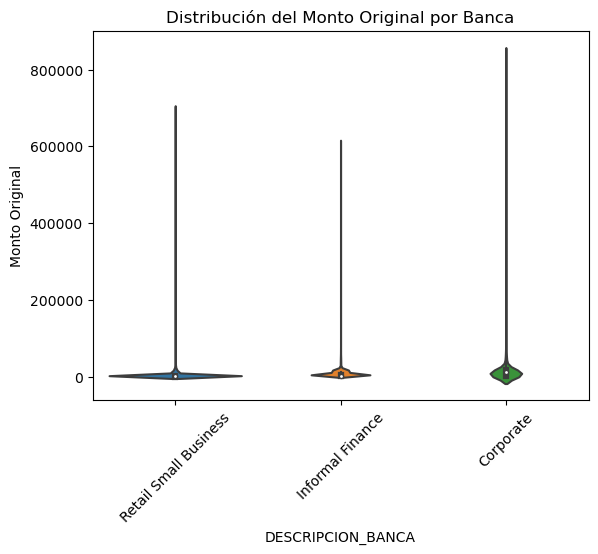

In [50]:
sns.violinplot(x='DESCRIPCION_BANCA', y='MontoOriginal',showfliers=False, data=df)
plt.title('Distribución del Monto Original por Banca')
plt.xlabel('DESCRIPCION_BANCA')
plt.ylabel('Monto Original')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

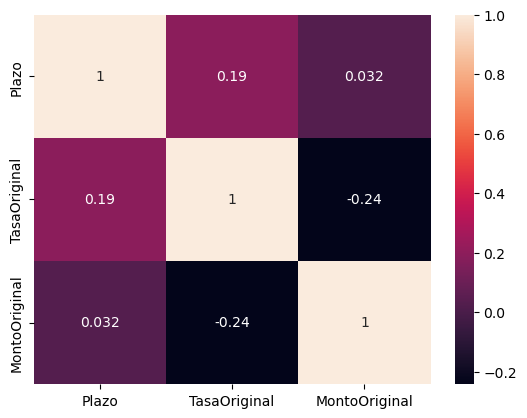

In [19]:
# Convertir a datetime
df['FechaDesembolso'] = pd.to_datetime(df['FechaDesembolso'])

# Ordenar por fecha
df.sort_values('FechaDesembolso', inplace=True)

# Gráfico de línea de una variable en el tiempo
df.plot(x='FechaDesembolso', y='TasaOriginal')

In [21]:
df['FechaDesembolso'] = pd.to_datetime(df['FechaDesembolso'])


In [22]:
df['Año'] = df['FechaDesembolso'].dt.year
df['Mes'] = df['FechaDesembolso'].dt.month
df['Dia'] = df['FechaDesembolso'].dt.day

In [24]:
df.sort_values('FechaDesembolso', inplace=True)


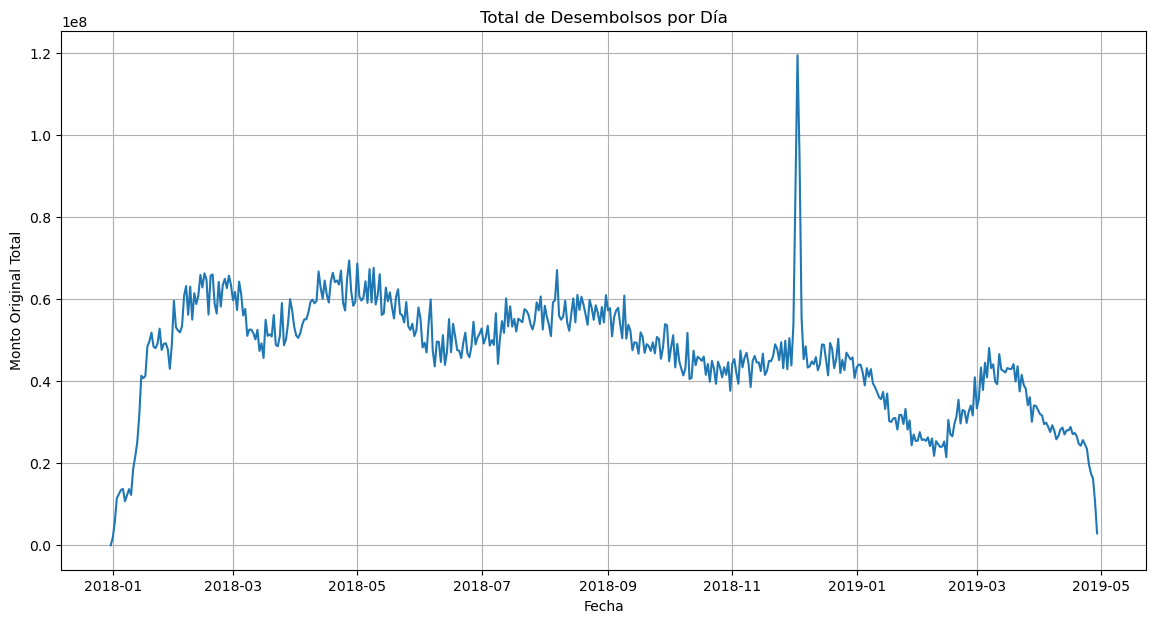

In [30]:
desembolsos_por_dia = df.groupby('FechaDesembolso')['MontoOriginal'].sum()
plt.figure(figsize=(14, 7))
plt.plot(desembolsos_por_dia.index, desembolsos_por_dia.values)
plt.title('Total de Desembolsos por Día')
plt.xlabel('Fecha')
plt.ylabel('Monto Original Total')
plt.grid(True)
plt.show()





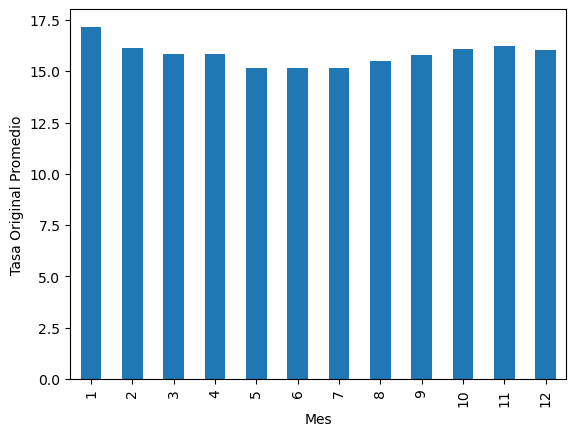

In [25]:
df.groupby(df['FechaDesembolso'].dt.month)['TasaOriginal'].mean().plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Tasa Original Promedio')
plt.show()

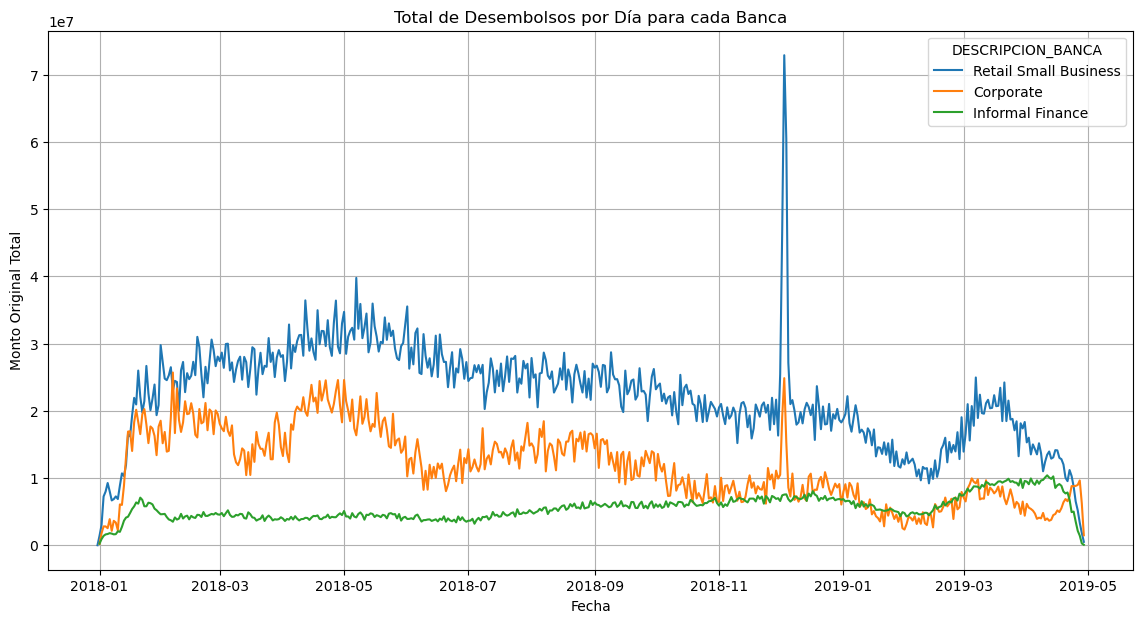

In [31]:
grouped_df = df.groupby(['FechaDesembolso', 'DESCRIPCION_BANCA'])['MontoOriginal'].sum().reset_index()

plt.figure(figsize=(14, 7))

for banca in grouped_df['DESCRIPCION_BANCA'].unique():
    subset = grouped_df[grouped_df['DESCRIPCION_BANCA'] == banca]
    plt.plot(subset['FechaDesembolso'], subset['MontoOriginal'], label=banca)

plt.title('Total de Desembolsos por Día para cada Banca')
plt.xlabel('Fecha')
plt.ylabel('Monto Original Total')
plt.legend(title='DESCRIPCION_BANCA')
plt.grid(True)
plt.show()


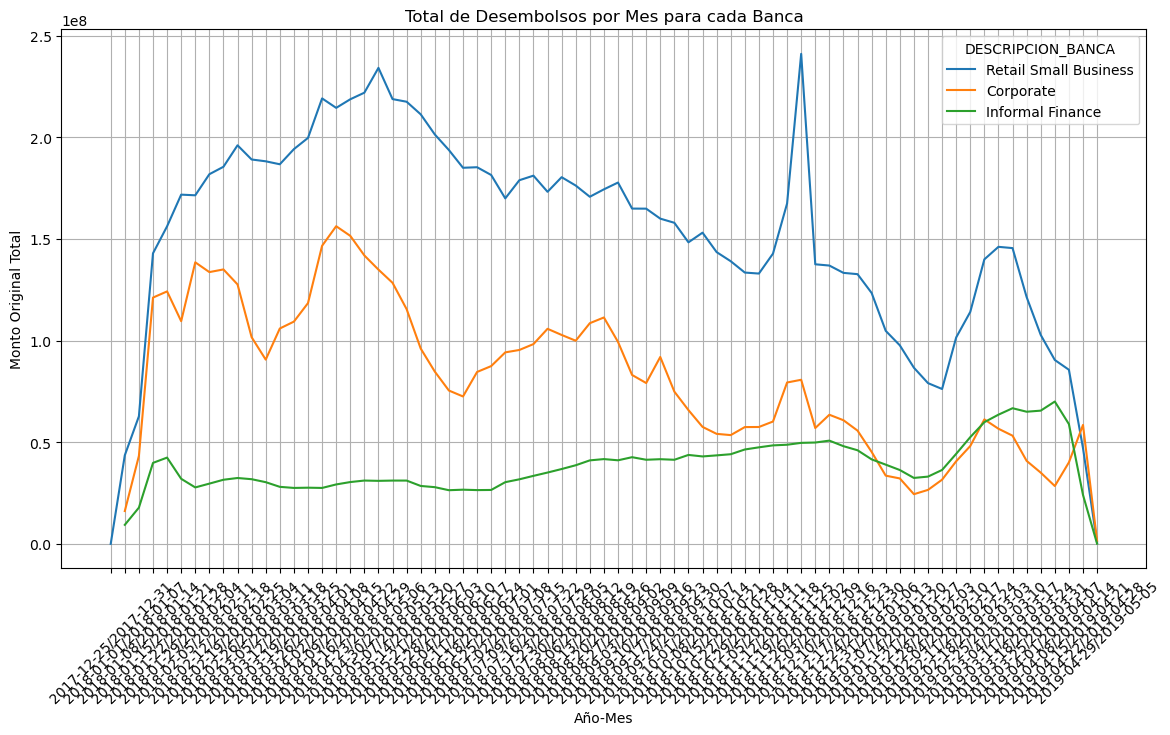

In [38]:
df['AñoMes'] = df['FechaDesembolso'].dt.to_period('W')
grouped_df = df.groupby(['AñoMes', 'DESCRIPCION_BANCA'])['MontoOriginal'].sum().reset_index()

plt.figure(figsize=(14, 7))

for banca in grouped_df['DESCRIPCION_BANCA'].unique():
    subset = grouped_df[grouped_df['DESCRIPCION_BANCA'] == banca]
    plt.plot(subset['AñoMes'].astype(str), subset['MontoOriginal'], label=banca)

plt.title('Total de Desembolsos por Mes para cada Banca')
plt.xlabel('Año-Mes')
plt.ylabel('Monto Original Total')
plt.legend(title='DESCRIPCION_BANCA')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


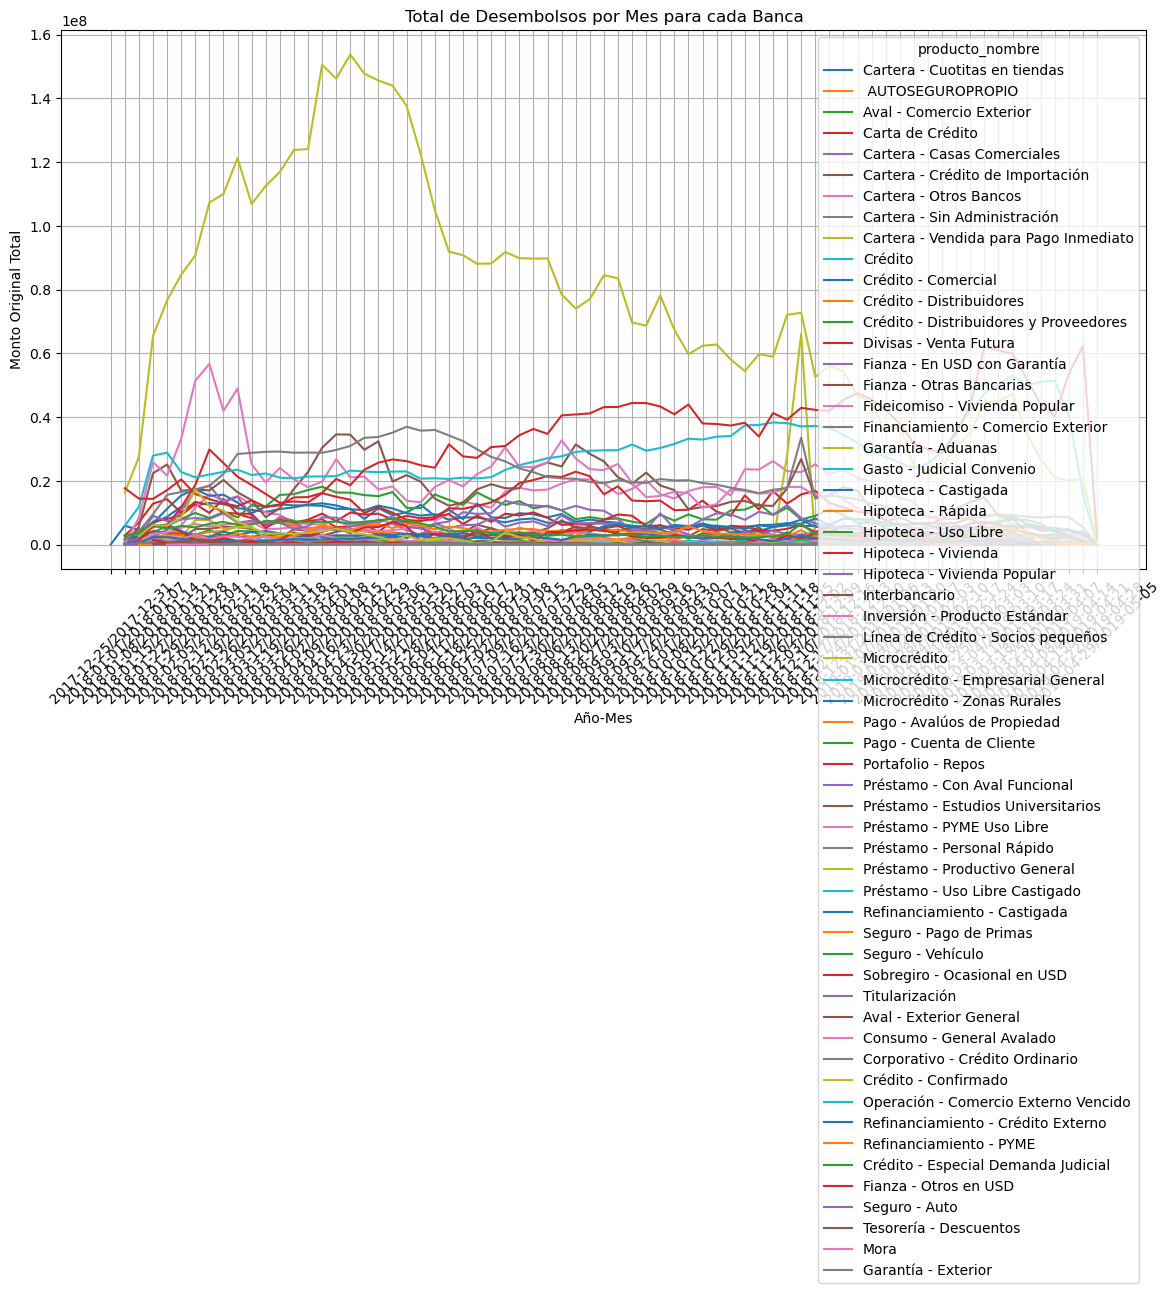

In [40]:
df['AñoMes'] = df['FechaDesembolso'].dt.to_period('W')
grouped_df = df.groupby(['AñoMes', 'producto_nombre'])['MontoOriginal'].sum().reset_index()

plt.figure(figsize=(14, 7))

for banca in grouped_df['producto_nombre'].unique():
    subset = grouped_df[grouped_df['producto_nombre'] == banca]
    plt.plot(subset['AñoMes'].astype(str), subset['MontoOriginal'], label=banca)

plt.title('Total de Desembolsos por Mes para cada Banca')
plt.xlabel('Año-Mes')
plt.ylabel('Monto Original Total')
plt.legend(title='producto_nombre')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [47]:
import plotly.express as px
import pandas as pd
df['AñoMes'] = df['FechaDesembolso'].dt.to_period('Q')

# Asumiendo que tu DataFrame ya tiene las columnas 'AñoMes' y 'MontoOriginal' apropiadamente formateadas y agrupadas.
grouped_df = df.groupby(['AñoMes', 'producto_nombre'])['MontoOriginal'].sum().reset_index()

# Convertir la columna 'AñoMes' a string para que Plotly la maneje mejor
grouped_df['AñoMes'] = grouped_df['AñoMes'].astype(str)

fig = px.line(grouped_df, x='AñoMes', y='MontoOriginal', color='producto_nombre',
              title='Total de Desembolsos por Semana para cada Producto',
              labels={'MontoOriginal': 'Monto Original Total', 'AñoMes': 'Año-Semana'},
              line_shape='linear')

# Mejora la legibilidad de los ticks del eje x
fig.update_xaxes(tickangle=45)

fig.show()

